In [12]:
#!/usr/bin/python
#  -*- coding:utf-8 -*-

import numpy as np
import os
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
def convolve(image, weight):
    height, width = image.shape
    h, w = weight.shape
    height_new = height - h + 1
    width_new = width - w + 1
    image_new = np.zeros((height_new, width_new), dtype=np.float)
    for i in range(height_new):
        for j in range(width_new):
            image_new[i,j] = np.sum(image[i:i+h, j:j+w] * weight)
    image_new = image_new.clip(0, 255)
    image_new = np.rint(image_new).astype('uint8')
    return image_new

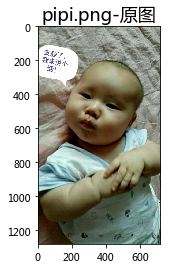

In [16]:
if __name__ == "__main__":
#     A = Image.open("lena.png", 'r')
    A = Image.open("pipi.jpg", 'r')
    output_path = './Pic2/'
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    plt.title(u'pipi.png-原图', fontsize=18)
    plt.imshow(A)
    plt.show()
    a = np.array(A)
    soble_x = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]))
    soble_y = np.array(([-1, -2, -1], [0, 0, 0], [1, 2, 1]))
    soble = np.array(([-1, -1, 0], [-1, 0, 1], [0, 1, 1]))
    prewitt_x = np.array(([-1, 0, 1], [-1, 0, 1], [-1, 0, 1]))
    prewitt_y = np.array(([-1, -1,-1], [0, 0, 0], [1, 1, 1]))
    prewitt = np.array(([-2, -1, 0], [-1, 0, 1], [0, 1, 2]))
    laplacian = np.array(([0, -1, 0], [-1, 4, -1], [0, -1, 0]))
    laplacian2 = np.array(([-1, -1, -1], [-1, 8, -1], [-1, -1, -1]))
    weight_list = ('soble_x', 'soble_y', 'soble', 'prewitt_x', 'prewitt_y', 'prewitt', 'laplacian', 'laplacian2')

梯度检测：
soble_x R G B


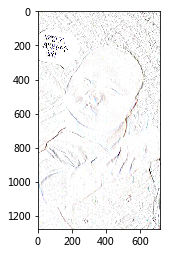

soble_y R G B


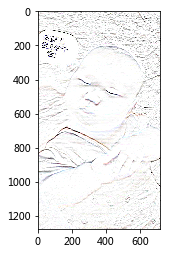

soble R G B


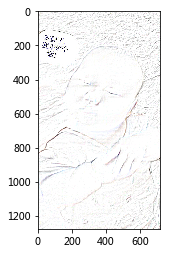

prewitt_x R G B


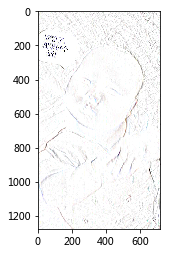

prewitt_y R G B


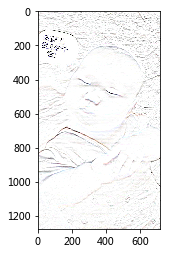

prewitt R G B


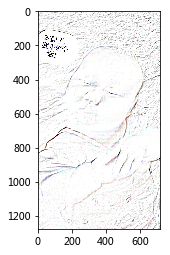

laplacian R G B


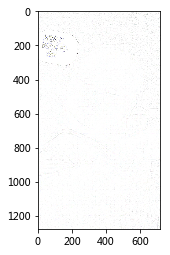

laplacian2 R G B


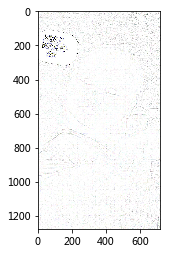

In [15]:
    print '梯度检测：'
    for weight in weight_list:
        print weight, 'R',
        R = convolve(a[:, :, 0], eval(weight))
        print 'G',
        G = convolve(a[:, :, 1], eval(weight))
        print 'B'
        B = convolve(a[:, :, 2], eval(weight))
        I = 255 - np.stack((R, G, B), 2)
#         plt.title(u'梯度检测-I值为%s:'%I, fontsize=18)
        plt.imshow(Image.fromarray(I))
        plt.show()
        # Image.fromarray(I).save(output_path + weight + '.png')

梯度检测XY：
soble_x R G B
soble_y R G B


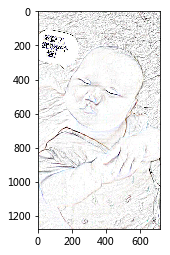

soble R G B
prewitt_x R G B


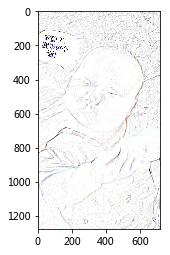

In [17]:
    # # X & Y
    print '梯度检测XY：'
    for w in (0, 2):
        weight = weight_list[w]
        print weight, 'R',
        R = convolve(a[:, :, 0], eval(weight))
        print 'G',
        G = convolve(a[:, :, 1], eval(weight))
        print 'B'
        B = convolve(a[:, :, 2], eval(weight))
        I1 = np.stack((R, G, B), 2)

        weight = weight_list[w+1]
        print weight, 'R',
        R = convolve(a[:, :, 0], eval(weight))
        print 'G',
        G = convolve(a[:, :, 1], eval(weight))
        print 'B'
        B = convolve(a[:, :, 2], eval(weight))
        I2 = np.stack((R, G, B), 2)

        I = 255 - np.maximum(I1, I2)
#         plt.title(u'梯度检测XY-I值为:%s' % I, fontsize=18)
        plt.imshow(Image.fromarray(I))
        plt.show()
        # Image.fromarray(I).save(output_path + weight[:-2] + '_XY.png')